Read section 3.1 of the book before using these notes.

Before coding, create a dedicated Python environment for this course (use the same method as STAT303-1). If you see a `ModuleNotFoundError`, install the missing package, for example `pip install scikit-learn` or `pip install statsmodels`.

Note: these notes focus on implementation. The book provides the conceptual explanations.


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import seaborn as sns

sns.set_theme(style="whitegrid", font_scale=1.2)

## Learning objectives

By the end of this notebook you should be able to:

- Fit a simple linear regression model ($Y=\beta_0+\beta_1X+\varepsilon$) using `statsmodels` and `sklearn`.
- Interpret the slope and intercept in context.
- Evaluate model performance on a held-out test set (RMSE, MAE, $R^2$).
- Compute and visualize confidence intervals (mean response) vs prediction intervals (new observation).


## Dataset

- Training set: `Datasets/Car_features_train.csv`, `Datasets/Car_prices_train.csv`
- Test set: `Datasets/Car_features_test.csv`, `Datasets/Car_prices_test.csv`

In [2]:
# Reading training set
trainf = pd.read_csv('./Datasets/Car_features_train.csv') # Predictors
trainp = pd.read_csv('./Datasets/Car_prices_train.csv') # Response
train = pd.merge(trainf,trainp)
print(train.shape)
train.head()

(4960, 11)


,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,18473,bmw,6 Series,2020,Semi-Auto,11,Diesel,145,53.3282,3.0,37980
1,15064,bmw,6 Series,2019,Semi-Auto,10813,Diesel,145,53.0430,3.0,33980
2,18268,bmw,6 Series,2020,Semi-Auto,6,Diesel,145,53.4379,3.0,36850
3,18480,bmw,6 Series,2017,Semi-Auto,18895,Diesel,145,51.5140,3.0,25998
4,18492,bmw,6 Series,2015,Automatic,62953,Diesel,160,51.4903,3.0,18990


In [3]:
# Read the test data
testf = pd.read_csv('./Datasets/Car_features_test.csv') # Predictors
testp = pd.read_csv('./Datasets/Car_prices_test.csv') # Response
test = pd.merge(testf, testp)
print(test.shape)
test.head()

(2672, 11)


,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,12000,merc,GLS Class,2017,Automatic,12046,Diesel,150,37.1965,3.0,38000
1,12001,vw,Amarok,2017,Automatic,37683,Diesel,260,36.2442,3.0,23495
2,12004,merc,GLS Class,2019,Automatic,10000,Diesel,145,33.8061,3.0,59999
3,12013,skoda,Scala,2019,Manual,3257,Petrol,145,49.8767,1.0,16713
4,12017,audi,RS6,2015,Semi-Auto,20982,Petrol,325,29.4571,4.0,46000


## Simple Linear Regression

We will build a simple linear regression model to predict car price based on engine size.



### Training with `statsmodels` (formula API)

We will use `statsmodels.formula.api`. The formula interface lets you specify a model with a compact string (similar to R), which is convenient for statistical modeling.


In [4]:
import statsmodels.formula.api as smf

In [5]:
# Let's create the model_sm
    
# ols stands for Ordinary Least Squares - the name of the algorithm that optimizes Linear Regression models

# data input needs the dataframe that has the predictor and the response
# formula input needs to:
    # be a string
    # have the following syntax: "response~predictor"
    
# Using engineSize to predict price
ols_object = smf.ols(formula = 'price~engineSize', data = train)

In [6]:
#Using the fit() function of the 'ols' class to fit the model_sm, i.e., train the model_sm
model_sm = ols_object.fit()

In [7]:
#Printing model_sm summary which contains among other things, the model_sm coefficients
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     3177.
Date:                Fri, 16 Jan 2026   Prob (F-statistic):               0.00
Time:                        09:29:29   Log-Likelihood:                -53949.
No. Observations:                4960   AIC:                         1.079e+05
Df Residuals:                    4958   BIC:                         1.079e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4122.0357    522.260     -7.893      0.000   -5145.896   -3098.176
engineSize  1.299e+04    230.450     56.361      0.000    1.25e+04    1.34e+04
==============================================================================
Omnibus:                     1271.986   Durbin-Watson:                   0.517
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6490.719
Skew:                           1.137   Prob(JB):                         0.00
Kurtosis:                       8.122   Cond. No.                         7.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The fitted equation (from this dataset) is:
$\hat{price}$ = -4122.0357 + 12990 * `engineSize`


- $R^2$ is 39%. This is the proportion of variance in car price explained by `engineSize`.
- The coefficient of `engineSize` ($\hat{\beta}_1$) is statistically significant (p-value near 0), so there is evidence of a linear relationship.
- The 95% CI for $\hat{\beta}_1$ is [1.25e+04, 1.34e+04].
- Prediction intervals are not shown in the summary table.


The coefficient of `engineSize` is 1.299e+04 (dollars per liter).

- A one-unit increase in `engineSize` increases the expected price by about $12,990.
- A three-unit increase increases the expected price by about $38,970.


The coefficients can also be returned directly using the `params` attribute of the fitted `model_sm` object:

In [8]:
model_sm.params

Intercept     -4122.035744
engineSize    12988.281021
dtype: float64

**Visualize the regression line**

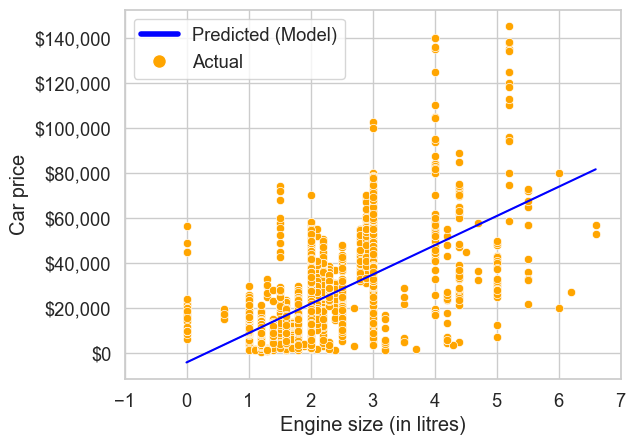

In [9]:
ax = sns.scatterplot(x=train.engineSize, y=train.price, color="orange")
sns.lineplot(x=train.engineSize, y=model_sm.fittedvalues, color="blue")
plt.xlim(-1, 7)
plt.xlabel("Engine size (in litres)")
plt.ylabel("Car price")
ax.yaxis.set_major_formatter("${x:,.0f}")

legend_elements = [
    Line2D([0], [0], color="blue", lw=4, label="Predicted (Model)"),
    Line2D([0], [0], marker="o", color="w", label="Actual", markerfacecolor="orange", markersize=10),
 ]
ax.legend(handles=legend_elements, loc="upper left");

The same plot can be made with `seaborn.regplot()`. It fits a simple linear regression with `y` as the response and `x` as the predictor, then overlays the fitted line on the scatterplot.


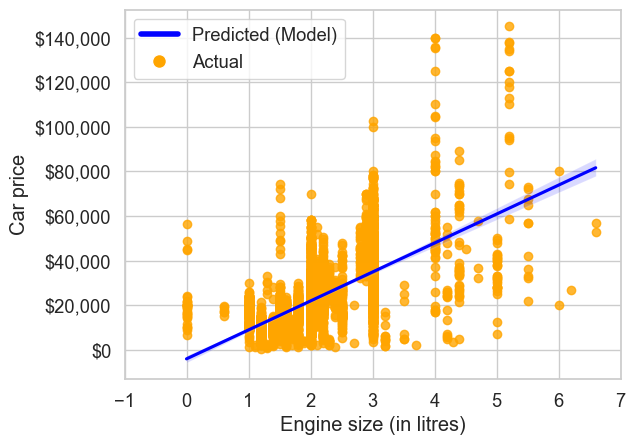

In [10]:
ax = sns.regplot(
    x="engineSize",
    y="price",
    data=train,
    color="orange",
    line_kws={"color": "blue"},
 )
plt.xlim(-1, 7)
plt.xlabel("Engine size (in litres)")
plt.ylabel("Car price")
ax.yaxis.set_major_formatter("${x:,.0f}")
ax.legend(handles=legend_elements, loc="upper left");

# Note: some `engineSize` values appear to be 0; those are likely data issues
# and should ideally be handled (e.g., imputed/filtered) before modeling.

The light shaded region around the blue line is a 95% confidence interval for the mean response.


### Model Prediction and Error Metrics

Now evaluate the fitted model on the test set.


In [11]:
# Predict car prices for the test set using the fitted statsmodels model
# (statsmodels will match the predictor name `engineSize` from `testf`).
pred_price = model_sm.predict(testf)

Visualize predicted prices against actual prices (perfect predictions would lie on the line $y=x$).


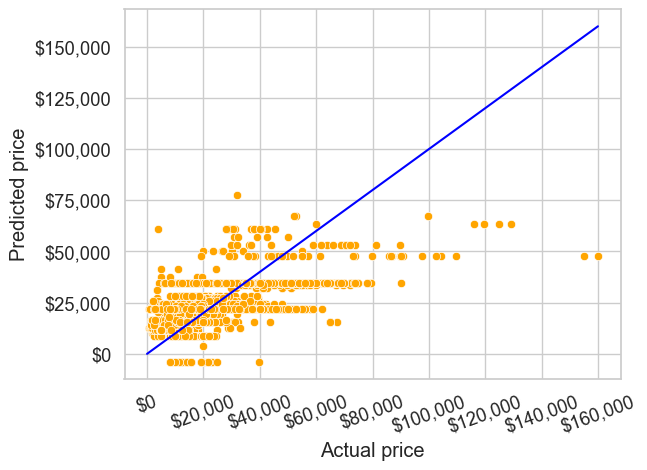

In [12]:
sns.scatterplot(x = testp.price, y = pred_price, color = 'orange')
#In case of a perfect prediction, all the points must lie on the line x = y.
ax = sns.lineplot(x = [0,testp.price.max()], y = [0,testp.price.max()],color='blue') #Plotting the line x = y.
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.xaxis.set_major_formatter('${x:,.0f}')
plt.xticks(rotation=20);

The predictions are limited because we are using only one predictor. We can likely improve performance by adding more predictors in multiple linear regression.


`statsmodels` does not include common error metrics, so we compute RMSE and MAE with NumPy. (The $R^2$ value is shown in the model summary above.)


In [13]:
sm_rmse = np.sqrt(np.mean((testp.price - pred_price)**2))
sm_mae = np.mean(np.abs(testp.price - pred_price))
print(f'Statsmodels Linear Regression Test RMSE: ${sm_rmse:,.2f}')
print(f'Statsmodels Linear Regression Test MAE: ${sm_mae:,.2f}')

Statsmodels Linear Regression Test RMSE: $12,995.11
Statsmodels Linear Regression Test MAE: $9,411.33


On this test set, the RMSE is around $13k.


### Confidence interval vs. prediction interval

Next we compute confidence and prediction intervals for the test-set predictions.


In [14]:
#Using the get_prediction() function associated with the 'model_sm' object to get the intervals
intervals = model_sm.get_prediction(testf)

In [15]:
#The function requires specifying alpha (probability of Type 1 error) instead of the confidence level to get the intervals
intervals.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,34842.807319,271.666459,34310.220826,35375.393812,9723.677232,59961.937406
1,34842.807319,271.666459,34310.220826,35375.393812,9723.677232,59961.937406
2,34842.807319,271.666459,34310.220826,35375.393812,9723.677232,59961.937406
3,8866.245277,316.580850,8245.606701,9486.883853,-16254.905974,33987.396528
4,47831.088340,468.949360,46911.740050,48750.436631,22700.782946,72961.393735
...,...,...,...,...,...,...
2667,47831.088340,468.949360,46911.740050,48750.436631,22700.782946,72961.393735
2668,34842.807319,271.666459,34310.220826,35375.393812,9723.677232,59961.937406
2669,8866.245277,316.580850,8245.606701,9486.883853,-16254.905974,33987.396528
2670,21854.526298,184.135754,21493.538727,22215.513869,-3261.551421,46970.604017


Show the confidence and prediction intervals for the test-set prices.


In [16]:
interval_table = intervals.summary_frame(alpha=0.05)

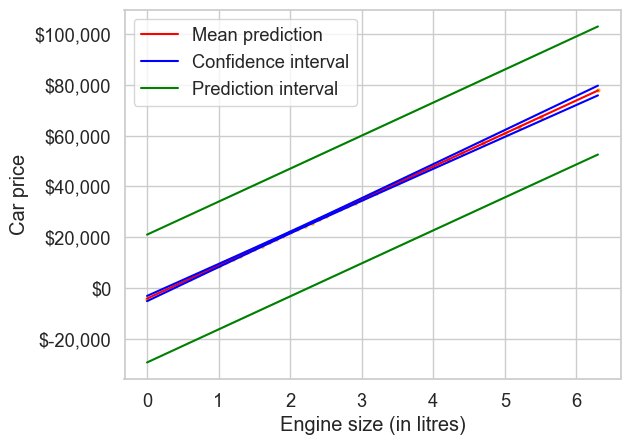

In [17]:
ax = sns.scatterplot(x = testf.engineSize, y = pred_price,color = 'orange', s = 10)
sns.lineplot(x = testf.engineSize, y = pred_price, color = 'red')
sns.lineplot(x = testf.engineSize, y = interval_table.mean_ci_lower, color = 'blue')
sns.lineplot(x = testf.engineSize, y = interval_table.mean_ci_upper, color = 'blue')
sns.lineplot(x = testf.engineSize, y = interval_table.obs_ci_lower, color = 'green')
sns.lineplot(x = testf.engineSize, y = interval_table.obs_ci_upper, color = 'green')

legend_elements = [Line2D([0], [0], color='red', label='Mean prediction'),
                   Line2D([0], [0], color='blue', label='Confidence interval'),
                  Line2D([0], [0], color='green', label='Prediction interval')]
ax.legend(handles=legend_elements, loc='upper left')
plt.xlabel('Engine size (in litres)')
plt.ylabel('Car price')
ax.yaxis.set_major_formatter('${x:,.0f}');

The prediction interval accounts for both noise and uncertainty in coefficient estimates, while the confidence interval only reflects coefficient uncertainty. The prediction interval is wider.


### Training with [`sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In `sklearn`, we typically work with:

- `X`: a feature matrix (DataFrame or ndarray)
- `y`: a 1D target vector (Series or 1D ndarray)

We can fit the model and evaluate it, but (unlike `statsmodels`) we do not get p-values or confidence intervals from the fitted object.


In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
# Prepare training data (X must be 2D; y should be 1D for sklearn metrics)
X_train = train[["engineSize"]]  # Note the double brackets to get a DataFrame (2D)
y_train = train["price"]

# Create the sklearn linear regression model
model_skl = LinearRegression()

# Fit the model
model_skl.fit(X_train, y_train)

# Inspect fitted parameters
slope = float(model_skl.coef_[0])
intercept = float(model_skl.intercept_)
print(f"Fitted model: price = {intercept:,.2f} + {slope:,.2f} * engineSize")

Fitted model: price = -4,122.04 + 12,988.28 * engineSize


Let's make prediction next

In [20]:
# Prepare test data
X_test = test[["engineSize"]]
y_test = test["price"]

# Predict on test
y_pred = model_skl.predict(X_test)

# Evaluate (train + test)
y_pred_train = model_skl.predict(X_train)

`sklearn` provides metrics, so we can import RMSE, MAE, and $R^2$ directly, the libary will take care of computing.


In [21]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

metrics = pd.DataFrame(
    {
        "Split": ["Train", "Test"],
        "RMSE": [
            root_mean_squared_error(y_train, y_pred_train),
            root_mean_squared_error(y_test, y_pred),
        ],
        "MAE": [
            mean_absolute_error(y_train, y_pred_train),
            mean_absolute_error(y_test, y_pred),
        ],
        "R2": [
            r2_score(y_train, y_pred_train),
            r2_score(y_test, y_pred),
        ],
    }
 )

metrics

,Split,RMSE,MAE,R2
0,Train,12807.526232,9260.285302,0.390498
1,Test,12995.106452,9411.325913,0.386990


Test performance is worse than training performance, which is expected since the model was fit on the training set.


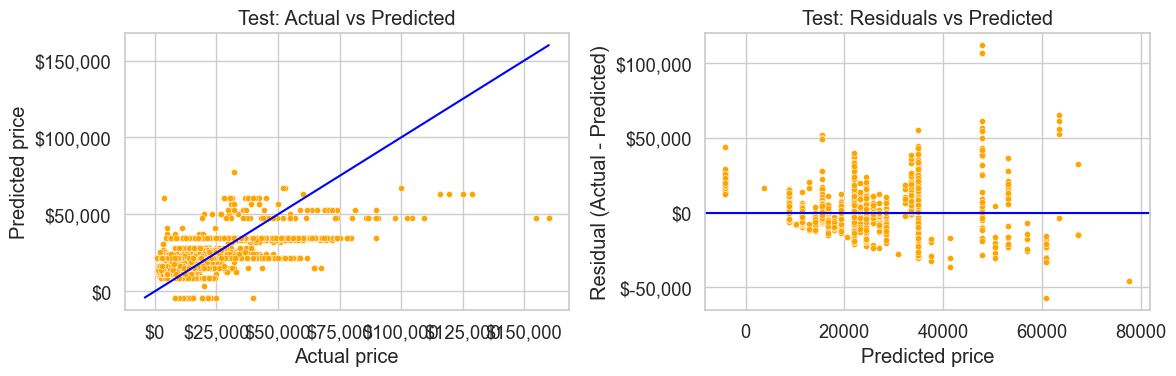

In [22]:
# Quick diagnostics on the test set
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Actual vs Predicted
sns.scatterplot(x=y_test, y=y_pred, color="orange", s=20, ax=axes[0])
min_price = float(min(y_test.min(), y_pred.min()))
max_price = float(max(y_test.max(), y_pred.max()))
axes[0].plot([min_price, max_price], [min_price, max_price], color="blue")
axes[0].set_title("Test: Actual vs Predicted")
axes[0].set_xlabel("Actual price")
axes[0].set_ylabel("Predicted price")
axes[0].xaxis.set_major_formatter("${x:,.0f}")
axes[0].yaxis.set_major_formatter("${x:,.0f}")

# Residuals vs Predicted
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals, color="orange", s=20, ax=axes[1])
axes[1].axhline(0, color="blue")
axes[1].set_title("Test: Residuals vs Predicted")
axes[1].set_xlabel("Predicted price")
axes[1].set_ylabel("Residual (Actual - Predicted)")
axes[1].yaxis.set_major_formatter("${x:,.0f}")

plt.tight_layout()

### Training with `statsmodels` (API)

`statsmodels` also provides a non-formula API (`statsmodels.api`) that works with matrices, similar to `sklearn`. This requires explicitly adding a constant term for the intercept but gives the same inference outputs (p-values, confidence intervals, etc.) as the formula API.


In [23]:
import statsmodels.api as sm

# Prepare the predictor matrix (need to add a constant term for the intercept)
X_train_sm = sm.add_constant(train[["engineSize"]])
y_train_sm = train["price"]

print("X_train with constant term:")
print(X_train_sm.head())

X_train with constant term:
   const  engineSize
0    1.0         3.0
1    1.0         3.0
2    1.0         3.0
3    1.0         3.0
4    1.0         3.0


In [24]:
# Create and fit the OLS model using the matrix API
model_sm_api = sm.OLS(y_train_sm, X_train_sm).fit()

# Display the model summary
model_sm_api.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     3177.
Date:                Fri, 16 Jan 2026   Prob (F-statistic):               0.00
Time:                        09:29:33   Log-Likelihood:                -53949.
No. Observations:                4960   AIC:                         1.079e+05
Df Residuals:                    4958   BIC:                         1.079e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4122.0357    522.260     -7.893      0.000   -5145.896   -3098.176
engineSize  1.299e+04    230.450     56.361      0.000    1.25e+04    1.34e+04
==============================================================================
Omnibus:                     1271.986   Durbin-Watson:                   0.517
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6490.719
Skew:                           1.137   Prob(JB):                         0.00
Kurtosis:                       8.122   Cond. No.                         7.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notice the coefficients match the formula API results exactly:

- Intercept (`const`): -4122.04
- Slope (`engineSize`): 1.299e+04

Both approaches give the same model, but the matrix API requires manually adding the constant term using `sm.add_constant()`.


In [25]:
# Make predictions on the test set (remember to add constant term)
X_test_sm = sm.add_constant(test[["engineSize"]])
pred_price_api = model_sm_api.predict(X_test_sm)

# Compare predictions from both statsmodels approaches
comparison = pd.DataFrame({
    "Formula API": pred_price[:5],
    "Matrix API": pred_price_api[:5],
    "Difference": pred_price[:5] - pred_price_api[:5]
})
print("First 5 predictions comparison:")
print(comparison)

First 5 predictions comparison:
    Formula API    Matrix API    Difference
0  34842.807319  34842.807319  7.275958e-12
1  34842.807319  34842.807319  7.275958e-12
2  34842.807319  34842.807319  7.275958e-12
3   8866.245277   8866.245277  0.000000e+00
4  47831.088340  47831.088340  0.000000e+00


## Summary and Key Takeaways

- All three approaches estimate the same coefficients when the intercept is handled consistently.
- scikit-learn (`LinearRegression`) is simple and prediction-focused, with easy access to metrics, but no inference statistics.
- statsmodels formula API provides rich statistical output and automatic intercept handling.
- statsmodels matrix API provides the same inference, with more explicit control, but requires adding the intercept manually.
- Choose based on whether you need inference, prediction, or explicit model control.
